In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from Finite_volume_method_1D import *
from joblib import Parallel, delayed

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 200,
})

In [ ]:
def func_to_parallelize(sigma):
    chippath = '../../DataKian/Al_LT165chip7/'
    Al_data = KID_data(chippath,
                    lambda_ph_in_nm=673,
                    KIDno=2,
                    readout_power=89,
                    temp_in_mK=120,
                    length=310,
                    T_eff=0.25,
                    N0=172e8,
                    sigma_IC=sigma,
                    D=15000)
    Al_data.fit_tail(start=500,showplots=False)
    Al_sim = KID_sim(Al_data,dt=0.01,dx_or_fraction=1/4,simtime_approx=20)
    return [Al_data,Al_sim,sim_data_comp(Al_data,Al_sim)]

sigmas = np.linspace(0,4,13)[1:]
datalistAl = Parallel(n_jobs=-1)(delayed(func_to_parallelize)(sigma) for sigma in sigmas)


100%|██████████| 5000/5000 [21:25<00:00,  3.89it/s]


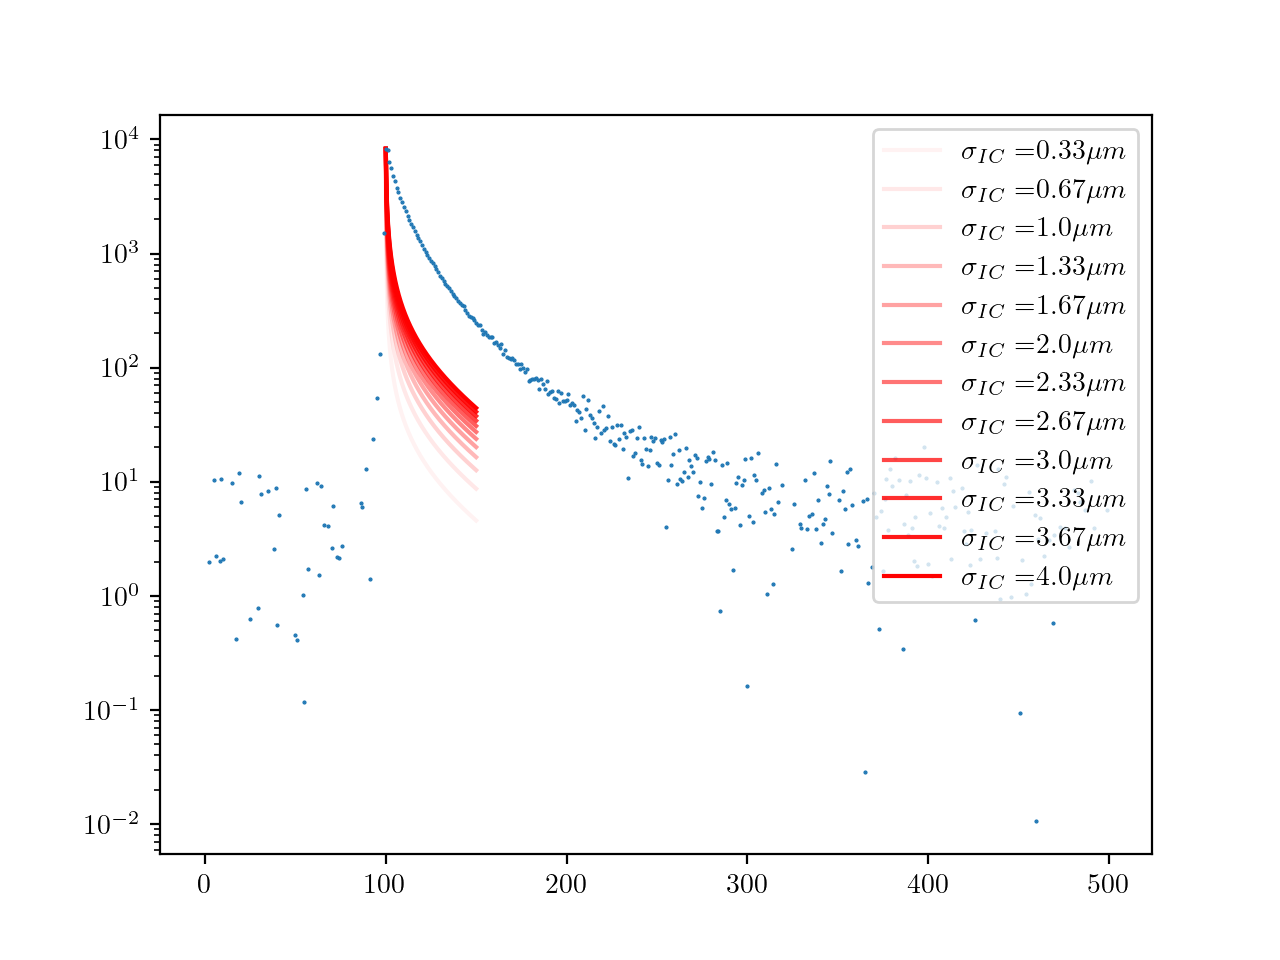

In [2]:
def func_to_parallelize(sigma):
    chippath = '../../DataKian/bTa_LT278W2chip5/'
    bTa_data = KID_data(chippath,
                        lambda_ph_in_nm=673,
                        KIDno=3,
                        readout_power=96,
                        temp_in_mK=140,
                        length=90,
                        T_eff=0.110,#0.100,
                        N0=303e8,
                        sigma_IC=sigma,
                        D=0)
    bTa_data.fit_tail(start=160,end=300,showplots=False)
    bTa_sim = KID_sim(bTa_data,dt=0.01,dx_or_fraction=1/4,simtime_approx=50)
    return [bTa_data,bTa_sim,sim_data_comp(bTa_data,bTa_sim)]

sigmas = np.linspace(0,4,13)[1:]
datalistbTa = Parallel(n_jobs=-1)(delayed(func_to_parallelize)(sigma) for sigma in sigmas)
np.save('../dataICsweep_per_D/D=0.npy',datalistbTa)
#D=0
datalist = datalistbTa
data_list = [datael[0] for datael in datalist]
comp_list = [datael[2] for datael in datalist]
plt.figure()
for sigma,data,comp in zip(sigmas,data_list,comp_list):
    label = r'$\sigma_{IC} = $'+str(round(sigma,2))+r'$\mu m$'
    alpha = np.max([0.05,(sigma-np.min(sigmas))/(np.max(sigmas)-np.min(sigmas))])
    plt.semilogy(comp.t_sim_aligned,comp.Nqp_sim,color='r',alpha=alpha,label=label)
plt.semilogy(data.t_full,comp.Nqp_phase_data,ls='',marker='.',markersize=1)
plt.legend()
plt.show()

100%|██████████| 5000/5000 [21:30<00:00,  3.87it/s]


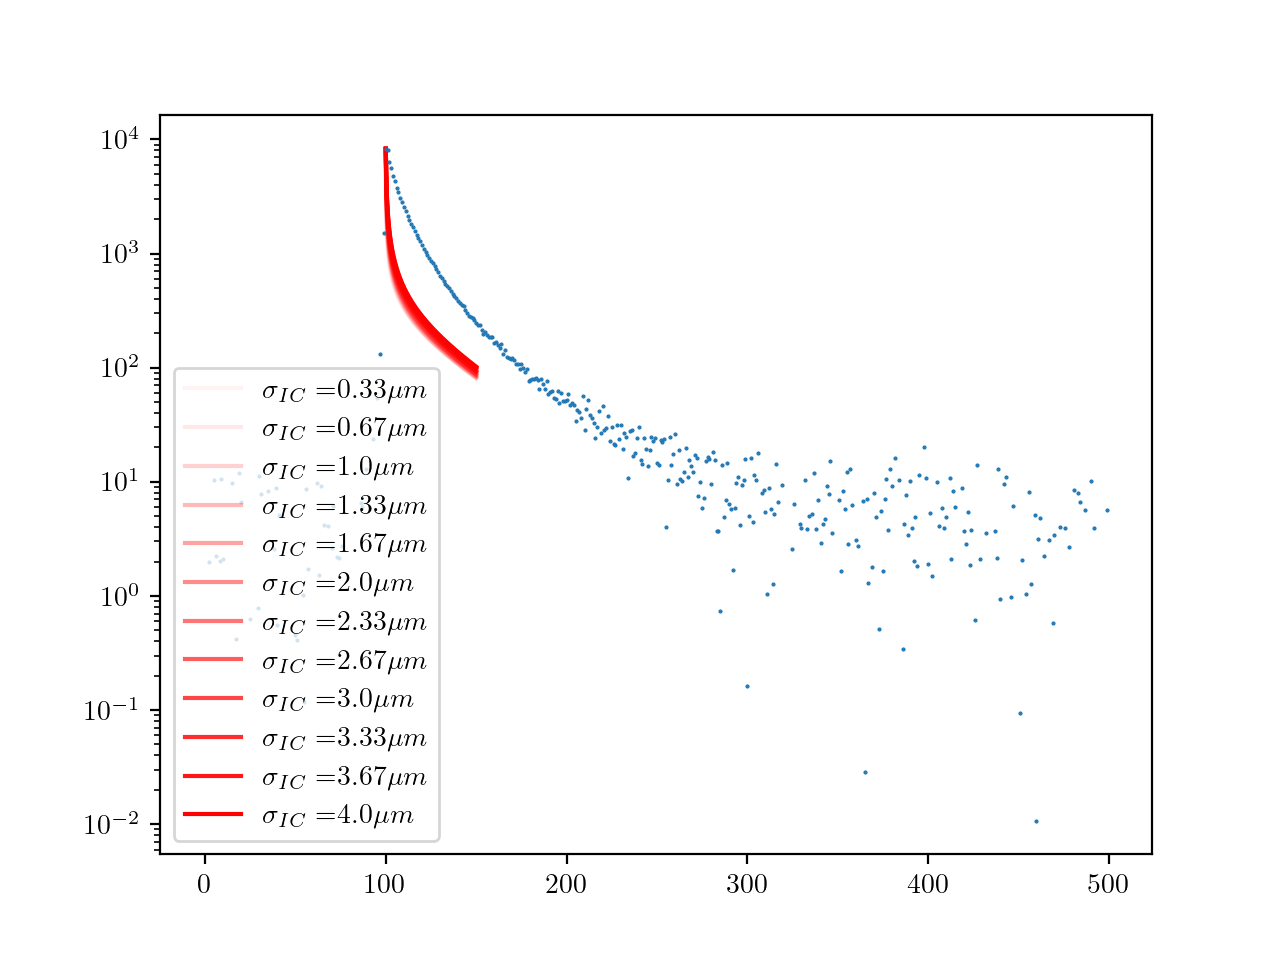

In [3]:
def func_to_parallelize(sigma):
    chippath = '../../DataKian/bTa_LT278W2chip5/'
    bTa_data = KID_data(chippath,
                        lambda_ph_in_nm=673,
                        KIDno=3,
                        readout_power=96,
                        temp_in_mK=140,
                        length=90,
                        T_eff=0.110,#0.100,
                        N0=303e8,
                        sigma_IC=sigma,
                        D=1)
    bTa_data.fit_tail(start=160,end=300,showplots=False)
    bTa_sim = KID_sim(bTa_data,dt=0.01,dx_or_fraction=1/4,simtime_approx=50)
    return [bTa_data,bTa_sim,sim_data_comp(bTa_data,bTa_sim)]

sigmas = np.linspace(0,4,13)[1:]
datalistbTa = Parallel(n_jobs=-1)(delayed(func_to_parallelize)(sigma) for sigma in sigmas)
np.save('../dataICsweep_per_D/D=1.npy',datalistbTa)
#D=1
datalist = datalistbTa
data_list = [datael[0] for datael in datalist]
comp_list = [datael[2] for datael in datalist]
plt.figure()
for sigma,data,comp in zip(sigmas,data_list,comp_list):
    label = r'$\sigma_{IC} = $'+str(round(sigma,2))+r'$\mu m$'
    alpha = np.max([0.05,(sigma-np.min(sigmas))/(np.max(sigmas)-np.min(sigmas))])
    plt.semilogy(comp.t_sim_aligned,comp.Nqp_sim,color='r',alpha=alpha,label=label)
plt.semilogy(data.t_full,comp.Nqp_phase_data,ls='',marker='.',markersize=1)
plt.legend()
plt.show()

100%|██████████| 5000/5000 [21:02<00:00,  3.96it/s]


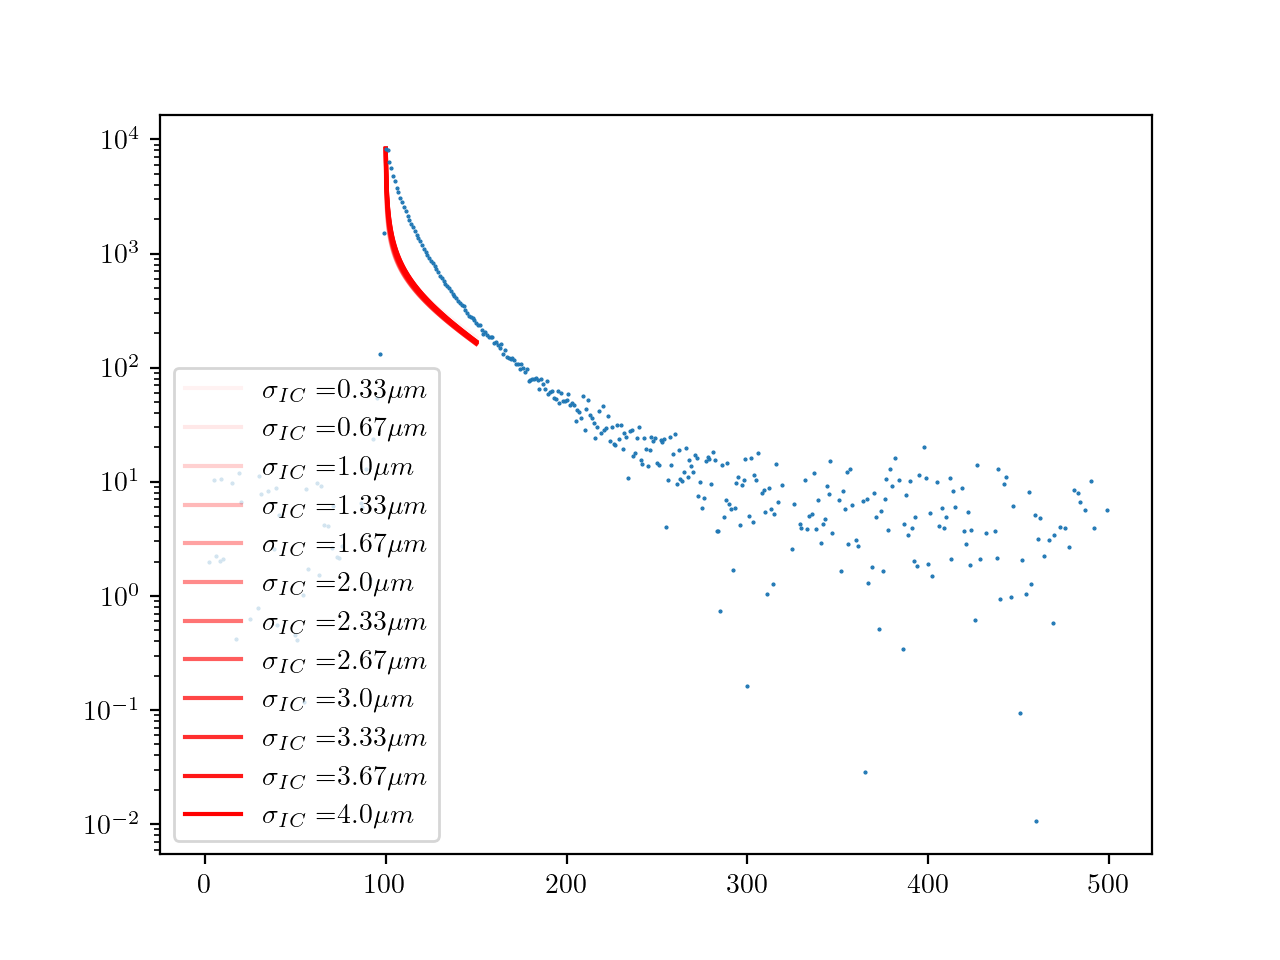

In [4]:
def func_to_parallelize(sigma):
    chippath = '../../DataKian/bTa_LT278W2chip5/'
    bTa_data = KID_data(chippath,
                        lambda_ph_in_nm=673,
                        KIDno=3,
                        readout_power=96,
                        temp_in_mK=140,
                        length=90,
                        T_eff=0.110,#0.100,
                        N0=303e8,
                        sigma_IC=sigma,
                        D=5)
    bTa_data.fit_tail(start=160,end=300,showplots=False)
    bTa_sim = KID_sim(bTa_data,dt=0.01,dx_or_fraction=1/4,simtime_approx=50)
    return [bTa_data,bTa_sim,sim_data_comp(bTa_data,bTa_sim)]

sigmas = np.linspace(0,4,13)[1:]
datalistbTa = Parallel(n_jobs=-1)(delayed(func_to_parallelize)(sigma) for sigma in sigmas)
np.save('../dataICsweep_per_D/D=5.npy',datalistbTa)
#D=5
datalist = datalistbTa
data_list = [datael[0] for datael in datalist]
comp_list = [datael[2] for datael in datalist]
plt.figure()
for sigma,data,comp in zip(sigmas,data_list,comp_list):
    label = r'$\sigma_{IC} = $'+str(round(sigma,2))+r'$\mu m$'
    alpha = np.max([0.05,(sigma-np.min(sigmas))/(np.max(sigmas)-np.min(sigmas))])
    plt.semilogy(comp.t_sim_aligned,comp.Nqp_sim,color='r',alpha=alpha,label=label)
plt.semilogy(data.t_full,comp.Nqp_phase_data,ls='',marker='.',markersize=1)
plt.legend()
plt.show()

100%|██████████| 5000/5000 [21:22<00:00,  3.90it/s]


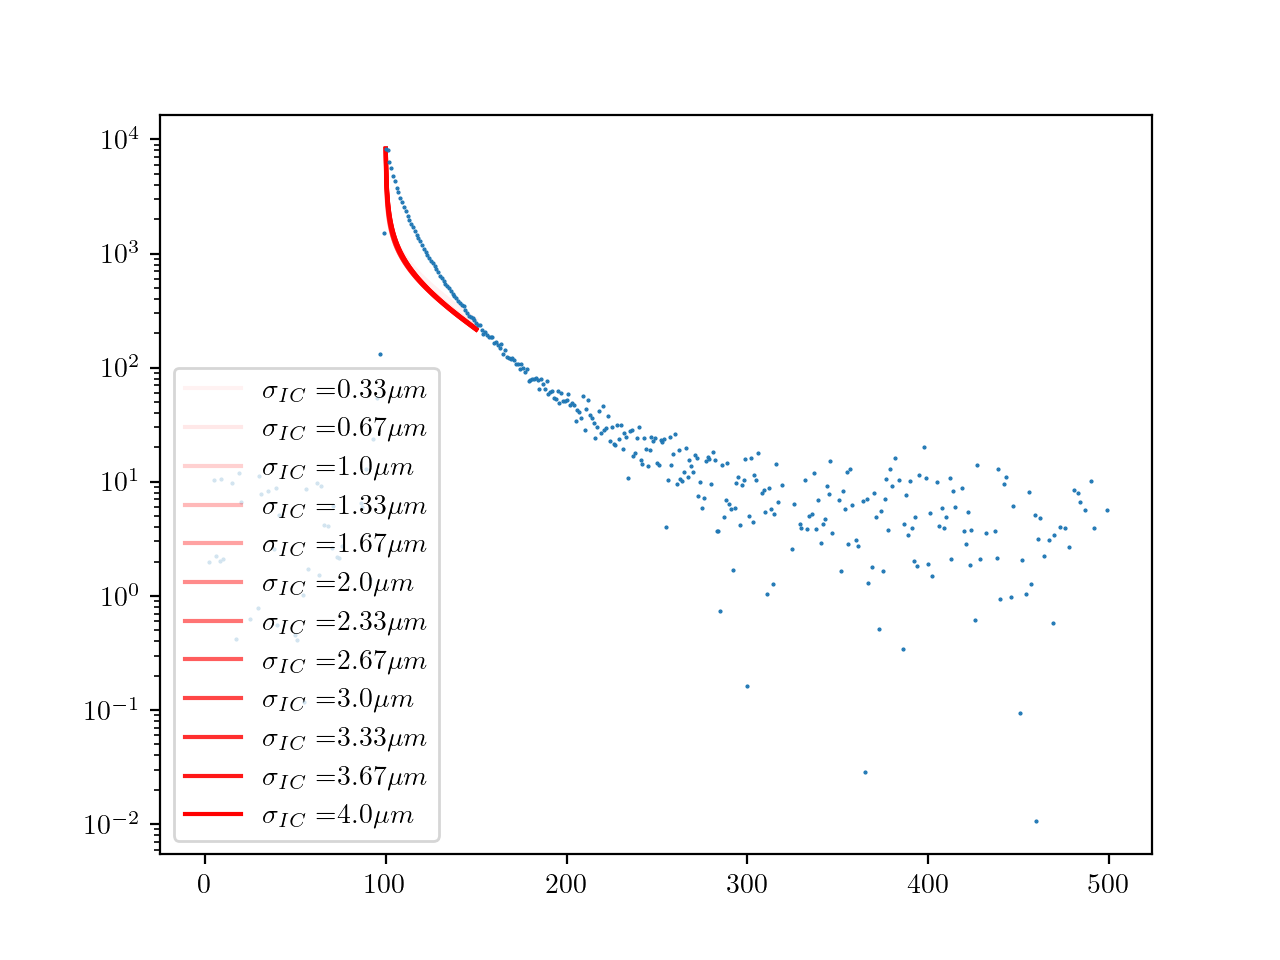

In [5]:
def func_to_parallelize(sigma):
    chippath = '../../DataKian/bTa_LT278W2chip5/'
    bTa_data = KID_data(chippath,
                        lambda_ph_in_nm=673,
                        KIDno=3,
                        readout_power=96,
                        temp_in_mK=140,
                        length=90,
                        T_eff=0.110,#0.100,
                        N0=303e8,
                        sigma_IC=sigma,
                        D=10)
    bTa_data.fit_tail(start=160,end=300,showplots=False)
    bTa_sim = KID_sim(bTa_data,dt=0.01,dx_or_fraction=1/4,simtime_approx=50)
    return [bTa_data,bTa_sim,sim_data_comp(bTa_data,bTa_sim)]

sigmas = np.linspace(0,4,13)[1:]
datalistbTa = Parallel(n_jobs=-1)(delayed(func_to_parallelize)(sigma) for sigma in sigmas)
np.save('../dataICsweep_per_D/D=10.npy',datalistbTa)
#D=10
datalist = datalistbTa
data_list = [datael[0] for datael in datalist]
comp_list = [datael[2] for datael in datalist]
plt.figure()
for sigma,data,comp in zip(sigmas,data_list,comp_list):
    label = r'$\sigma_{IC} = $'+str(round(sigma,2))+r'$\mu m$'
    alpha = np.max([0.05,(sigma-np.min(sigmas))/(np.max(sigmas)-np.min(sigmas))])
    plt.semilogy(comp.t_sim_aligned,comp.Nqp_sim,color='r',alpha=alpha,label=label)
plt.semilogy(data.t_full,comp.Nqp_phase_data,ls='',marker='.',markersize=1)
plt.legend()
plt.show()

100%|██████████| 5000/5000 [20:04<00:00,  4.15it/s]


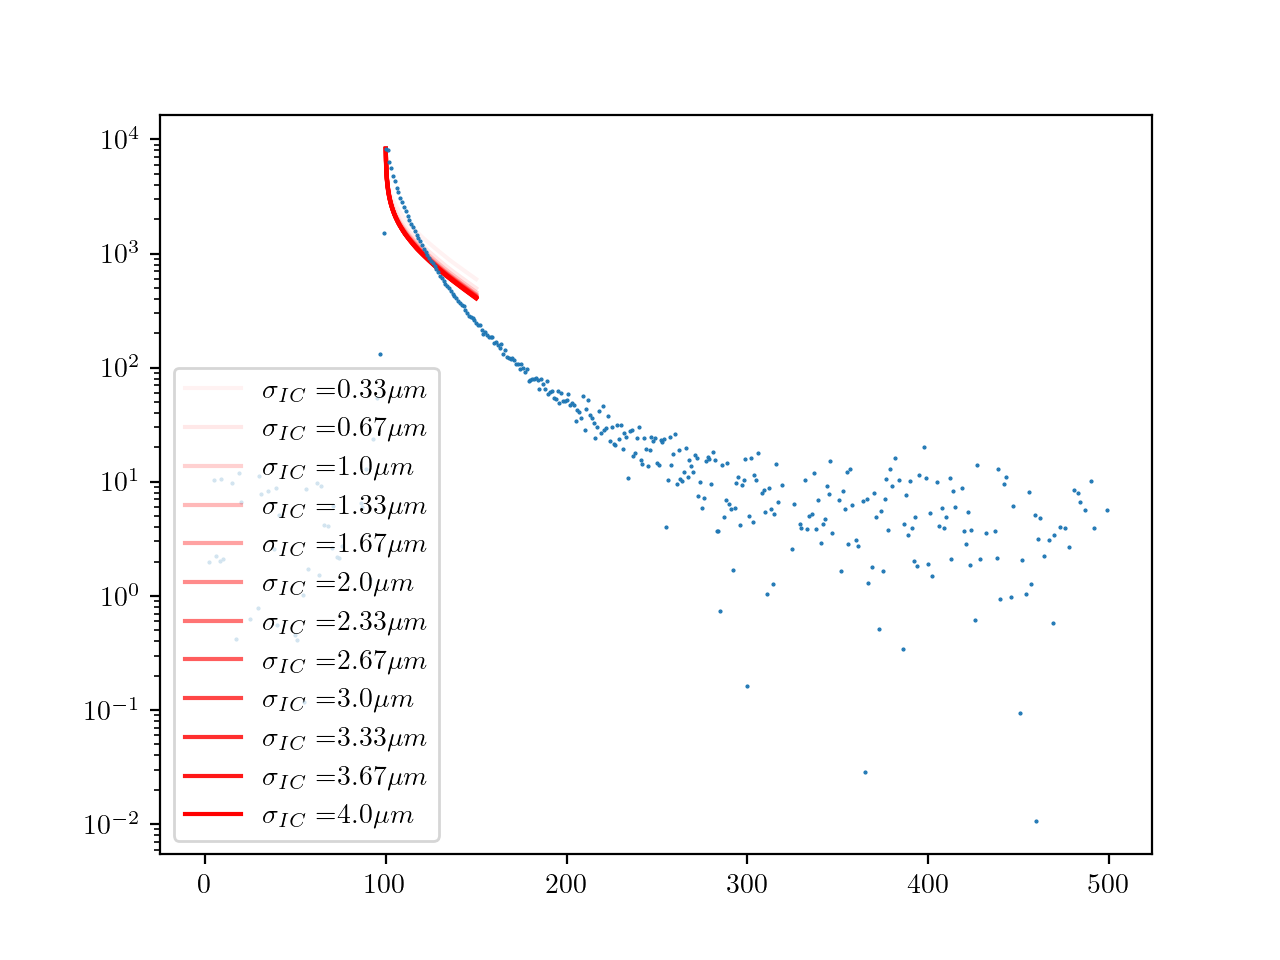

In [6]:
def func_to_parallelize(sigma):
    chippath = '../../DataKian/bTa_LT278W2chip5/'
    bTa_data = KID_data(chippath,
                        lambda_ph_in_nm=673,
                        KIDno=3,
                        readout_power=96,
                        temp_in_mK=140,
                        length=90,
                        T_eff=0.110,#0.100,
                        N0=303e8,
                        sigma_IC=sigma,
                        D=50)
    bTa_data.fit_tail(start=160,end=300,showplots=False)
    bTa_sim = KID_sim(bTa_data,dt=0.01,dx_or_fraction=1/4,simtime_approx=50)
    return [bTa_data,bTa_sim,sim_data_comp(bTa_data,bTa_sim)]

sigmas = np.linspace(0,4,13)[1:]
datalistbTa = Parallel(n_jobs=-1)(delayed(func_to_parallelize)(sigma) for sigma in sigmas)
np.save('../dataICsweep_per_D/D=50.npy',datalistbTa)
#D=50
datalist = datalistbTa
data_list = [datael[0] for datael in datalist]
comp_list = [datael[2] for datael in datalist]
plt.figure()
for sigma,data,comp in zip(sigmas,data_list,comp_list):
    label = r'$\sigma_{IC} = $'+str(round(sigma,2))+r'$\mu m$'
    alpha = np.max([0.05,(sigma-np.min(sigmas))/(np.max(sigmas)-np.min(sigmas))])
    plt.semilogy(comp.t_sim_aligned,comp.Nqp_sim,color='r',alpha=alpha,label=label)
plt.semilogy(data.t_full,comp.Nqp_phase_data,ls='',marker='.',markersize=1)
plt.legend()
plt.show()

100%|██████████| 5000/5000 [20:32<00:00,  4.06it/s]


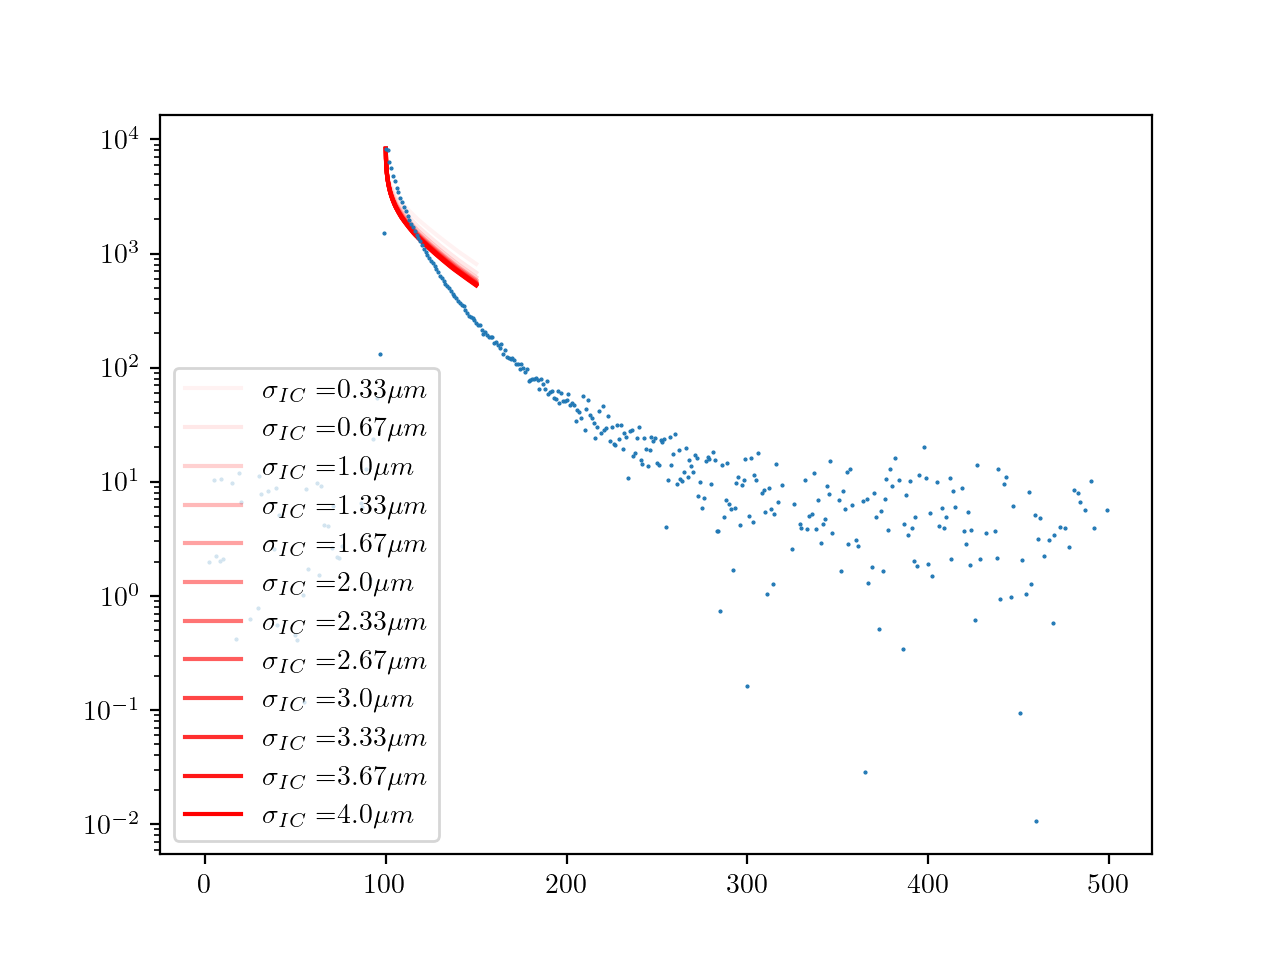

In [7]:
def func_to_parallelize(sigma):
    chippath = '../../DataKian/bTa_LT278W2chip5/'
    bTa_data = KID_data(chippath,
                        lambda_ph_in_nm=673,
                        KIDno=3,
                        readout_power=96,
                        temp_in_mK=140,
                        length=90,
                        T_eff=0.110,#0.100,
                        N0=303e8,
                        sigma_IC=sigma,
                        D=100)
    bTa_data.fit_tail(start=160,end=300,showplots=False)
    bTa_sim = KID_sim(bTa_data,dt=0.01,dx_or_fraction=1/4,simtime_approx=50)
    return [bTa_data,bTa_sim,sim_data_comp(bTa_data,bTa_sim)]

sigmas = np.linspace(0,4,13)[1:]
datalistbTa = Parallel(n_jobs=-1)(delayed(func_to_parallelize)(sigma) for sigma in sigmas)
np.save('../dataICsweep_per_D/D=100.npy',datalistbTa)
#D=100
datalist = datalistbTa
data_list = [datael[0] for datael in datalist]
comp_list = [datael[2] for datael in datalist]
plt.figure()
for sigma,data,comp in zip(sigmas,data_list,comp_list):
    label = r'$\sigma_{IC} = $'+str(round(sigma,2))+r'$\mu m$'
    alpha = np.max([0.05,(sigma-np.min(sigmas))/(np.max(sigmas)-np.min(sigmas))])
    plt.semilogy(comp.t_sim_aligned,comp.Nqp_sim,color='r',alpha=alpha,label=label)
plt.semilogy(data.t_full,comp.Nqp_phase_data,ls='',marker='.',markersize=1)
plt.legend()
plt.show()

100%|██████████| 5000/5000 [20:39<00:00,  4.03it/s]


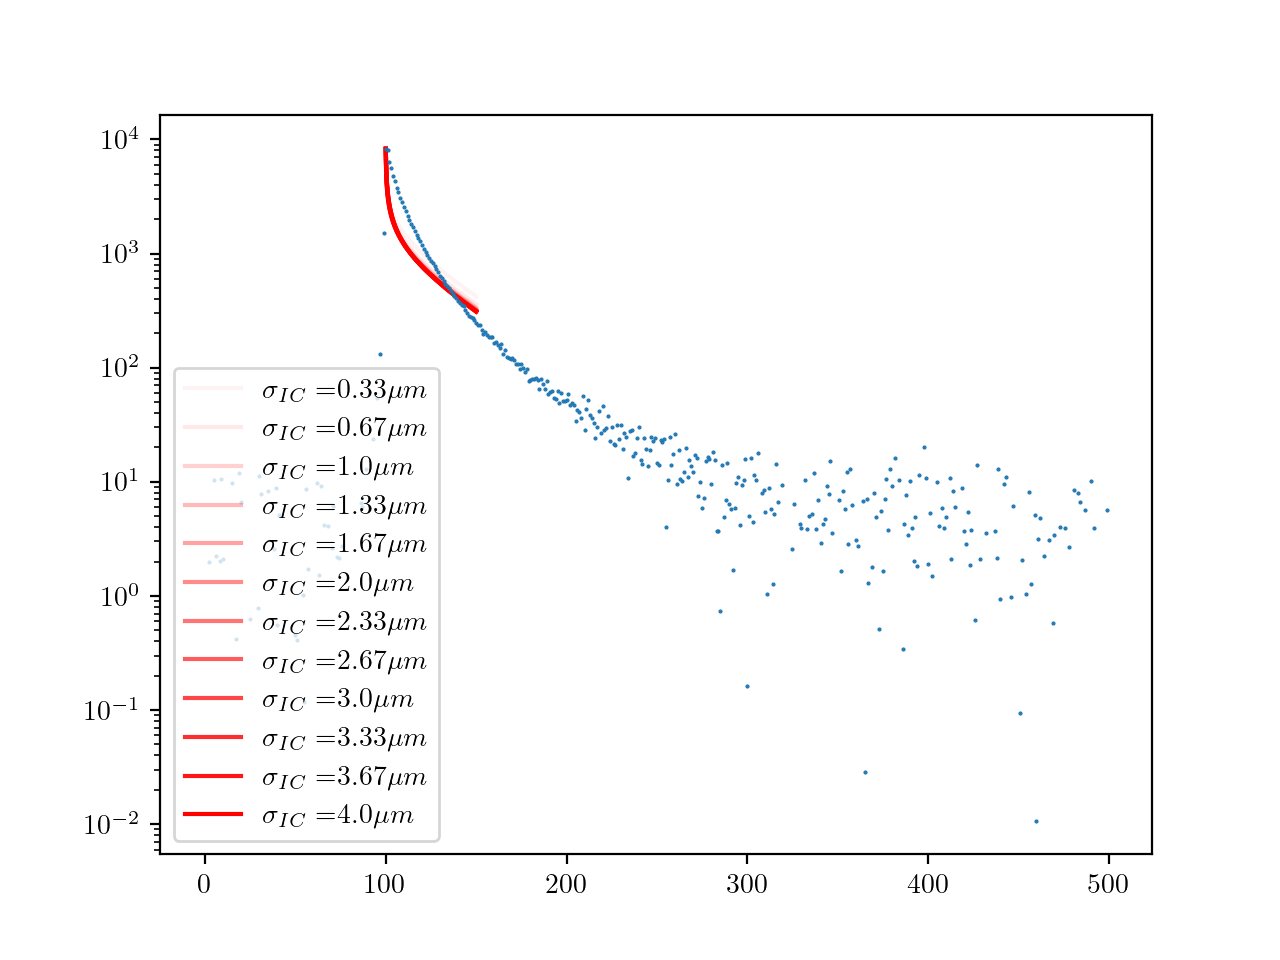

In [8]:
def func_to_parallelize(sigma):
    chippath = '../../DataKian/bTa_LT278W2chip5/'
    bTa_data = KID_data(chippath,
                        lambda_ph_in_nm=673,
                        KIDno=3,
                        readout_power=96,
                        temp_in_mK=140,
                        length=90,
                        T_eff=0.110,#0.100,
                        N0=303e8,
                        sigma_IC=sigma,
                        D=25)
    bTa_data.fit_tail(start=160,end=300,showplots=False)
    bTa_sim = KID_sim(bTa_data,dt=0.01,dx_or_fraction=1/4,simtime_approx=50)
    return [bTa_data,bTa_sim,sim_data_comp(bTa_data,bTa_sim)]

sigmas = np.linspace(0,4,13)[1:]
datalistbTa = Parallel(n_jobs=-1)(delayed(func_to_parallelize)(sigma) for sigma in sigmas)
np.save('../dataICsweep_per_D/D=25.npy',datalistbTa)
#D=25
datalist = datalistbTa
data_list = [datael[0] for datael in datalist]
comp_list = [datael[2] for datael in datalist]
plt.figure()
for sigma,data,comp in zip(sigmas,data_list,comp_list):
    label = r'$\sigma_{IC} = $'+str(round(sigma,2))+r'$\mu m$'
    alpha = np.max([0.05,(sigma-np.min(sigmas))/(np.max(sigmas)-np.min(sigmas))])
    plt.semilogy(comp.t_sim_aligned,comp.Nqp_sim,color='r',alpha=alpha,label=label)
plt.semilogy(data.t_full,comp.Nqp_phase_data,ls='',marker='.',markersize=1)
plt.legend()
plt.show()

100%|██████████| 5000/5000 [20:26<00:00,  4.08it/s]


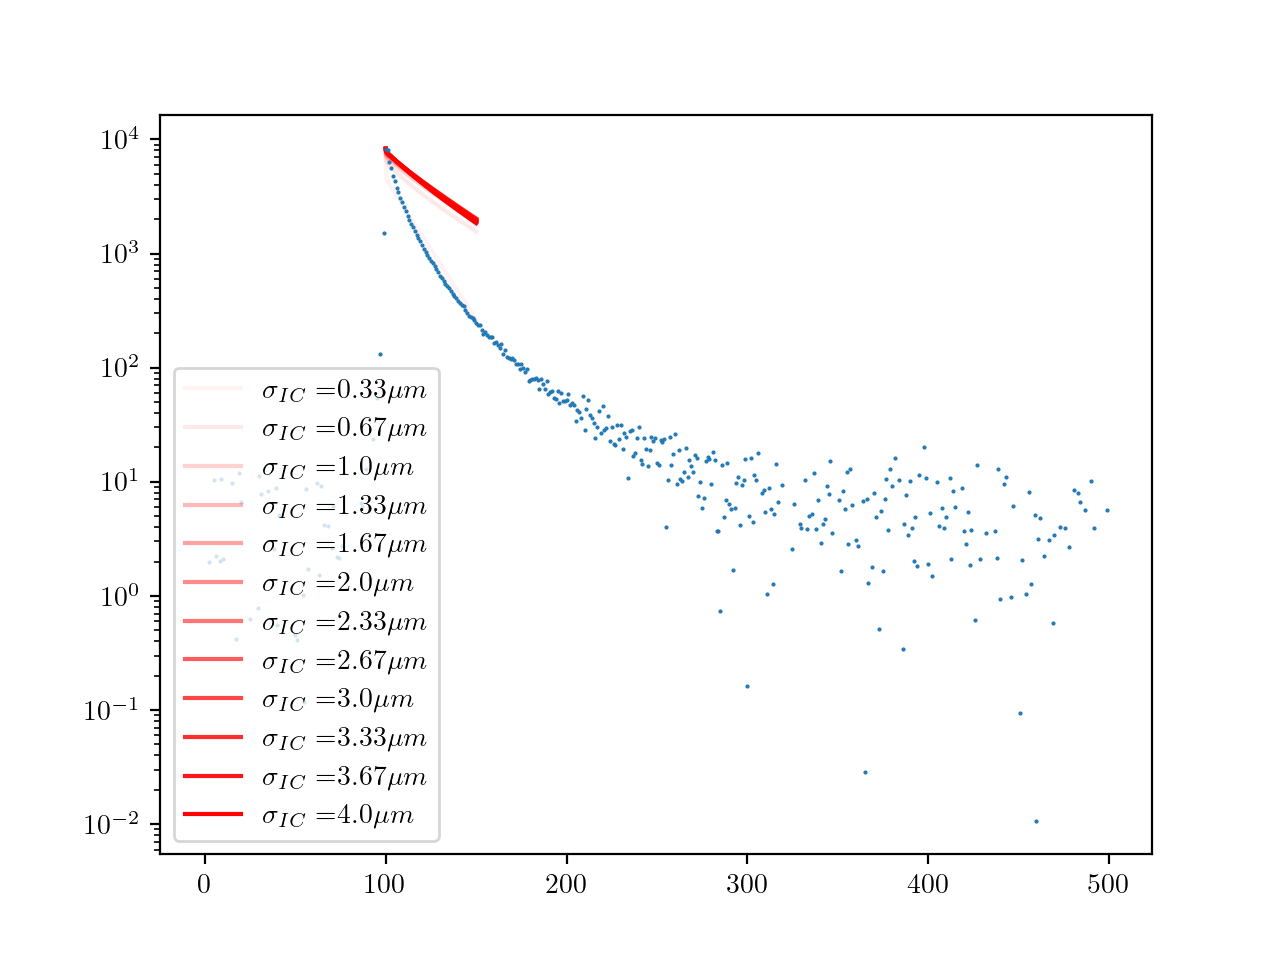

In [10]:
def func_to_parallelize(sigma):
    chippath = '../../DataKian/bTa_LT278W2chip5/'
    bTa_data = KID_data(chippath,
                        lambda_ph_in_nm=673,
                        KIDno=3,
                        readout_power=96,
                        temp_in_mK=140,
                        length=90,
                        T_eff=0.110,#0.100,
                        N0=303e8,
                        sigma_IC=sigma,
                        D=15000)
    bTa_data.fit_tail(start=160,end=300,showplots=False)
    bTa_sim = KID_sim(bTa_data,dt=0.01,dx_or_fraction=1/4,simtime_approx=50)
    return [bTa_data,bTa_sim,sim_data_comp(bTa_data,bTa_sim)]

sigmas = np.linspace(0,4,13)[1:]
datalistbTa = Parallel(n_jobs=-1)(delayed(func_to_parallelize)(sigma) for sigma in sigmas)
np.save('../dataICsweep_per_D/D=15000.npy',datalistbTa)
#D=25
datalist = datalistbTa
data_list = [datael[0] for datael in datalist]
comp_list = [datael[2] for datael in datalist]
plt.figure()
for sigma,data,comp in zip(sigmas,data_list,comp_list):
    label = r'$\sigma_{IC} = $'+str(round(sigma,2))+r'$\mu m$'
    alpha = np.max([0.05,(sigma-np.min(sigmas))/(np.max(sigmas)-np.min(sigmas))])
    plt.semilogy(comp.t_sim_aligned,comp.Nqp_sim,color='r',alpha=alpha,label=label)
plt.semilogy(data.t_full,comp.Nqp_phase_data,ls='',marker='.',markersize=1)
plt.legend()
plt.show()

100%|██████████| 5000/5000 [20:24<00:00,  4.08it/s]


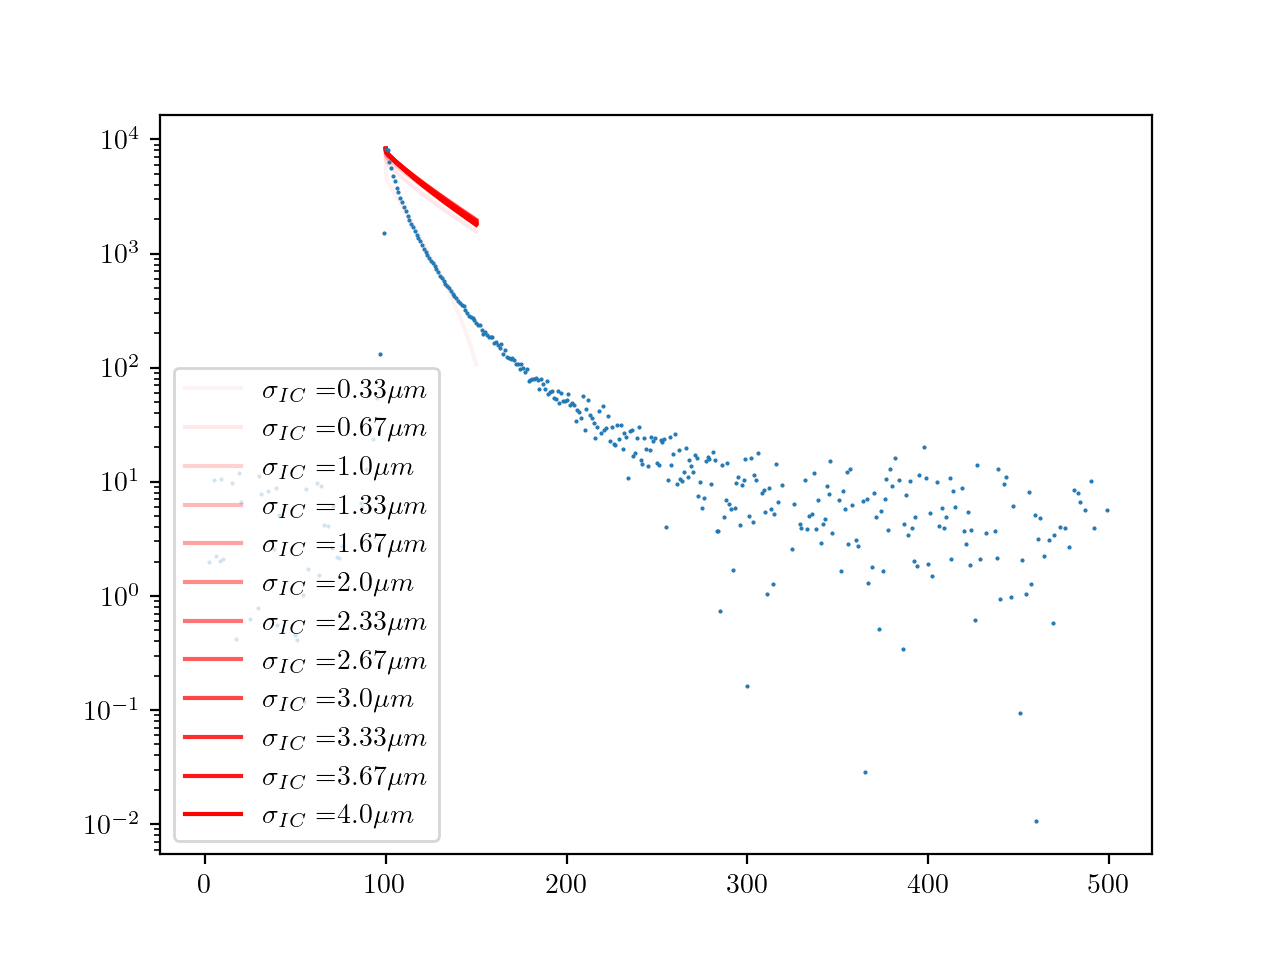

In [11]:
def func_to_parallelize(sigma):
    chippath = '../../DataKian/bTa_LT278W2chip5/'
    bTa_data = KID_data(chippath,
                        lambda_ph_in_nm=673,
                        KIDno=3,
                        readout_power=96,
                        temp_in_mK=140,
                        length=90,
                        T_eff=0.110,#0.100,
                        N0=303e8,
                        sigma_IC=sigma,
                        D=10000)
    bTa_data.fit_tail(start=160,end=300,showplots=False)
    bTa_sim = KID_sim(bTa_data,dt=0.01,dx_or_fraction=1/4,simtime_approx=50)
    return [bTa_data,bTa_sim,sim_data_comp(bTa_data,bTa_sim)]

sigmas = np.linspace(0,4,13)[1:]
datalistbTa = Parallel(n_jobs=-1)(delayed(func_to_parallelize)(sigma) for sigma in sigmas)
np.save('../dataICsweep_per_D/D=10000.npy',datalistbTa)
#D=10000
datalist = datalistbTa
data_list = [datael[0] for datael in datalist]
comp_list = [datael[2] for datael in datalist]
plt.figure()
for sigma,data,comp in zip(sigmas,data_list,comp_list):
    label = r'$\sigma_{IC} = $'+str(round(sigma,2))+r'$\mu m$'
    alpha = np.max([0.05,(sigma-np.min(sigmas))/(np.max(sigmas)-np.min(sigmas))])
    plt.semilogy(comp.t_sim_aligned,comp.Nqp_sim,color='r',alpha=alpha,label=label)
plt.semilogy(data.t_full,comp.Nqp_phase_data,ls='',marker='.',markersize=1)
plt.legend()
plt.show()

100%|██████████| 5000/5000 [20:24<00:00,  4.08it/s]


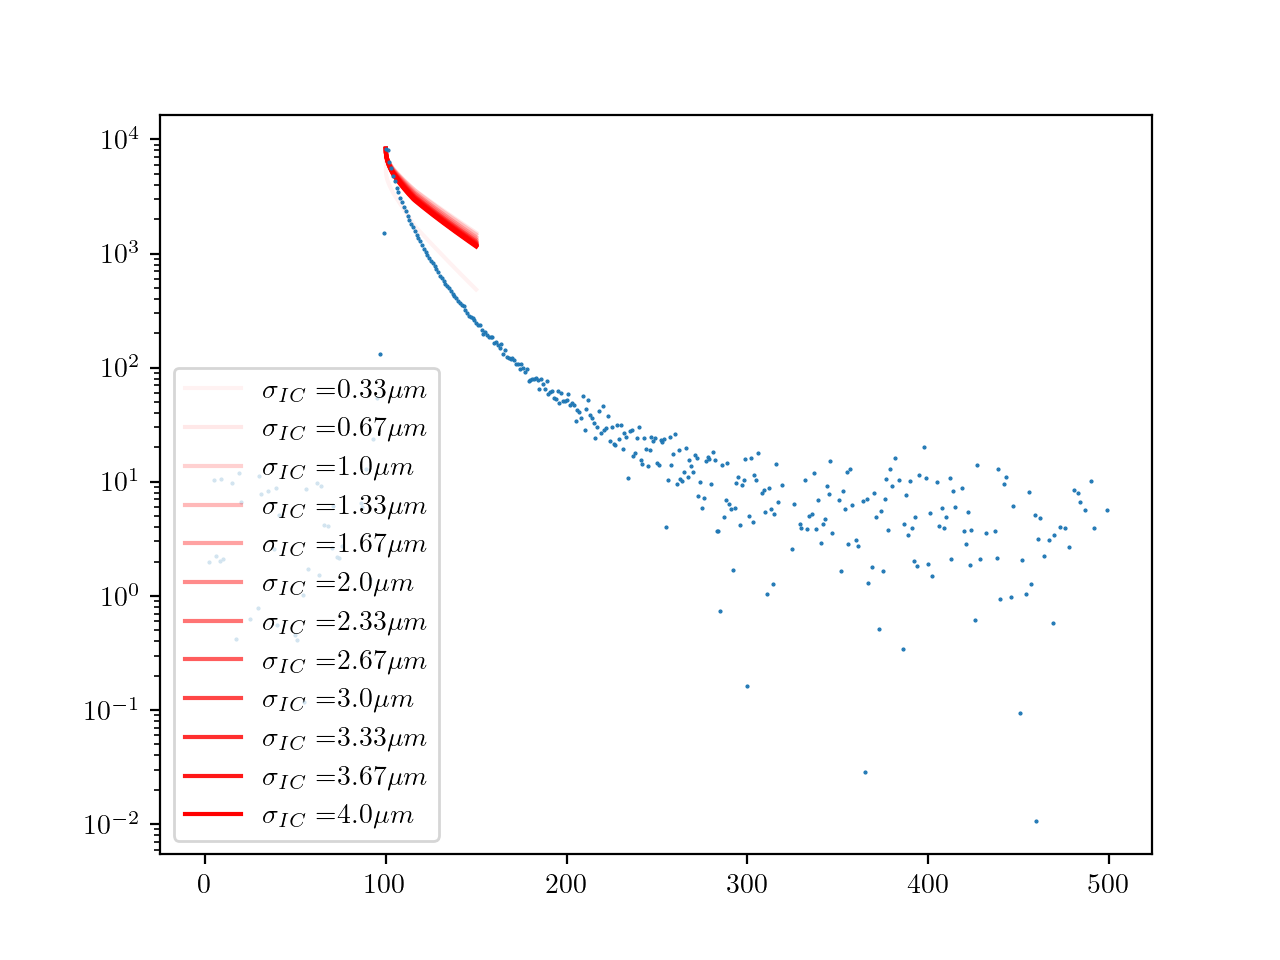

In [12]:
def func_to_parallelize(sigma):
    chippath = '../../DataKian/bTa_LT278W2chip5/'
    bTa_data = KID_data(chippath,
                        lambda_ph_in_nm=673,
                        KIDno=3,
                        readout_power=96,
                        temp_in_mK=140,
                        length=90,
                        T_eff=0.110,#0.100,
                        N0=303e8,
                        sigma_IC=sigma,
                        D=1000)
    bTa_data.fit_tail(start=160,end=300,showplots=False)
    bTa_sim = KID_sim(bTa_data,dt=0.01,dx_or_fraction=1/4,simtime_approx=50)
    return [bTa_data,bTa_sim,sim_data_comp(bTa_data,bTa_sim)]

sigmas = np.linspace(0,4,13)[1:]
datalistbTa = Parallel(n_jobs=-1)(delayed(func_to_parallelize)(sigma) for sigma in sigmas)
np.save('../dataICsweep_per_D/D=25.npy',datalistbTa)
#D=25
datalist = datalistbTa
data_list = [datael[0] for datael in datalist]
comp_list = [datael[2] for datael in datalist]
plt.figure()
for sigma,data,comp in zip(sigmas,data_list,comp_list):
    label = r'$\sigma_{IC} = $'+str(round(sigma,2))+r'$\mu m$'
    alpha = np.max([0.05,(sigma-np.min(sigmas))/(np.max(sigmas)-np.min(sigmas))])
    plt.semilogy(comp.t_sim_aligned,comp.Nqp_sim,color='r',alpha=alpha,label=label)
plt.semilogy(data.t_full,comp.Nqp_phase_data,ls='',marker='.',markersize=1)
plt.legend()
plt.show()